#1. Upload File

In [1]:
# Trained Data File: eye.xml, frontface.xml
# obama1,2,3
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
!ls -al

total 1480
drwxr-xr-x 1 root root   4096 Jun  3 04:16 .
drwxr-xr-x 1 root root   4096 Jun  3 04:15 ..
drwxr-xr-x 4 root root   4096 Jun  1 13:40 .config
-rw-r--r-- 1 root root 601661 Jun  3 04:16 haarcascade_eye_tree_eyeglasses.xml
-rw-r--r-- 1 root root 676709 Jun  3 04:16 haarcascade_frontalface_alt.xml
-rw-r--r-- 1 root root   9532 Jun  3 04:16 obama_01.jpeg
-rw-r--r-- 1 root root   5172 Jun  3 04:16 obama_02.jpeg
-rw-r--r-- 1 root root 194499 Jun  3 04:16 obama_03.jpg
drwxr-xr-x 1 root root   4096 Jun  1 13:40 sample_data


#2. Load File

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
file_name = "obama_01.jpeg"
face_cascade_name = "haarcascade_frontalface_alt.xml"
eye_cascade_name = "haarcascade_eye_tree_eyeglasses.xml"

In [6]:
face_cascade = cv2.CascadeClassifier()
eye_cascade = cv2.CascadeClassifier()

In [7]:
#1. load the cascade
if not face_cascade.load(cv2.samples.findFile(face_cascade_name)):
  print("Error loading face cascade")
  exit()
if not eye_cascade.load(cv2.samples.findFile(eye_cascade_name)):
  print("Error loading eye cascade")
  exit()

In [8]:
img = cv2.imread(file_name)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

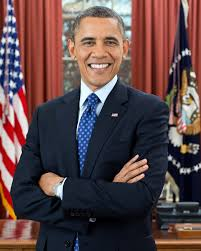

In [11]:
cv2_imshow(img)

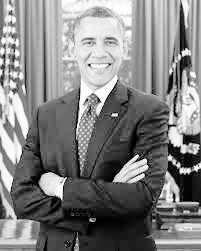

In [12]:
cv2_imshow(gray)

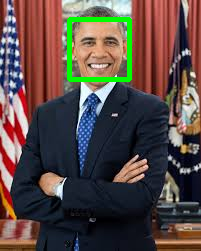

In [13]:
faces = face_cascade.detectMultiScale(gray)
for (x,y,w,h) in faces:
  center = (x+w//2, y+h//2)
  img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 3)
  faceROI = gray[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(faceROI)
  for (x2,y2,w2,h2) in eyes:
    eye_center = (x+x2+w2//2, y+y2+h2//2)
    radius = int(round(w2+h2)*0.25)
    img = cv2.circle(img, eye_center, radius, (0,255,255), 3)
cv2_imshow(img)